# Name - Kamuni Suhas

#                                      The Sparks Foundation - Data Science & Business Analytics  

## Exploratory Terrorist Attack Analysis

Importing our libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
import time

from datetime import datetime, date

from IPython.display import display, HTML
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

import ast
import string
import json

Displaying the first 5 rows of the data frame

In [2]:
df = pd.read_excel(r'C:\Users\KamuniSuhas\Desktop\globalterrorismdb_0718dist.xlsx')
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


## Data Inspection

The data frame contains 135 features, 1 of which is used for data frame indexing and 181,690 observations.

In [3]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 135 columns):
 #   Column              Dtype  
---  ------              -----  
 0   eventid             int64  
 1   iyear               int64  
 2   imonth              int64  
 3   iday                int64  
 4   approxdate          object 
 5   extended            int64  
 6   resolution          object 
 7   country             int64  
 8   country_txt         object 
 9   region              int64  
 10  region_txt          object 
 11  provstate           object 
 12  city                object 
 13  latitude            float64
 14  longitude           float64
 15  specificity         float64
 16  vicinity            int64  
 17  location            object 
 18  summary             object 
 19  crit1               int64  
 20  crit2               int64  
 21  crit3               int64  
 22  doubtterr           float64
 23  alternative         float64
 24  alternative_txt     objec

## Missing Data Tab

Tabulating the missing values for each feature with count and percentage.

In [4]:
Count = df.isnull().sum()
Perc = round(Count / 181691 * 100, 2)
series = [Count,Perc]
R_lt = pd.concat(series, keys=['Count','Percentage'] ,axis=1)
R_lt.sort_values(by='Count', ascending=False).head(60)

,Count,Percentage
gsubname3,181671,99.99
weapsubtype4_txt,181621,99.96
weapsubtype4,181621,99.96
weaptype4,181618,99.96
weaptype4_txt,181618,99.96
claimmode3,181558,99.93
claimmode3_txt,181558,99.93
gsubname2,181531,99.91
claim3,181373,99.82
guncertain3,181371,99.82


Plot the observed values against the missing ones

In [5]:
features = df.columns.tolist()
t1 = go.Scatter(
    x=features,
    y=[df[f].describe()['count'] for f in features],
    name='Observed Data',
    marker=dict(
        color='midnightblue'
    )    
)
t2 = go.Scatter(
    x=features,
    y=[df.shape[0] -df[f].describe()['count'] for f in features],
    name='Missing Data',
    marker=dict(
        color='#BF3030'
    )    
)
d_t = [t1, t2];
l_t = go.Layout(
    title='Missingmess Map',
    barmode='relative',
    xaxis=dict(
        title='Feature',
    ),
    yaxis=dict(
        title='Count',
    ),    
)
fg = go.Figure(data=d_t, layout=l_t)
iplot(fg)

We can see that observed and missing data are exactly opposite to each other and are mirror images of the same

## Identifying the First Values of Target Features

Select the list of features that contain missing values of less than 20% and that are not duplicated by another feature.

In [6]:
trgt_st = R_lt[R_lt['Percentage'] < 20.0]
kp_ft = trgt_st.index.values
#The nperps attribute contain 18.91% blank values.  However, an additional 64.31% are coded (-99, -9) as unknown.
kp_ft = kp_ft[kp_ft != 'nperps']
#Remove attributes that duplicate another attribute
kp_ft = kp_ft[kp_ft != 'country']
kp_ft = kp_ft[kp_ft != 'region']
kp_ft = kp_ft[kp_ft != 'attacktype1']
kp_ft = kp_ft[kp_ft != 'targtype1']
kp_ft = kp_ft[kp_ft != 'targsubtype1']
kp_ft = kp_ft[kp_ft != 'natlty1']
kp_ft = kp_ft[kp_ft != 'weaptype1']
kp_ft = kp_ft[kp_ft != 'weapsubtype1']

## Subset the Original Dataset

Only include the afeatures in the target set of features.

In [7]:
s_df = df.loc[:, kp_ft]
s_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 39 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   eventid           181691 non-null  int64  
 1   iyear             181691 non-null  int64  
 2   imonth            181691 non-null  int64  
 3   iday              181691 non-null  int64  
 4   extended          181691 non-null  int64  
 5   country_txt       181691 non-null  object 
 6   region_txt        181691 non-null  object 
 7   provstate         181270 non-null  object 
 8   city              181257 non-null  object 
 9   latitude          177135 non-null  float64
 10  longitude         177134 non-null  float64
 11  specificity       181685 non-null  float64
 12  vicinity          181691 non-null  int64  
 13  crit1             181691 non-null  int64  
 14  crit2             181691 non-null  int64  
 15  crit3             181691 non-null  int64  
 16  doubtterr         18

## Engineer/Substiute the missing values

The dataset is incconsistent when we classify the missing values. The data originally included, blanks, -9, and -99. For consistency in the data set, -1 is used for categorical features that are numeric and UNKNOWN is used for categorical features that are text. Number features that contain encoded missing values are subsitituted with 'NAN'.

In [8]:
#Categorical Features
s_df['guncertain1'].fillna(-1, inplace=True)
s_df['targsubtype1_txt'].fillna('UNKNOWN', inplace=True)
s_df['weapsubtype1_txt'].fillna('UNKNOWN', inplace=True)
s_df['specificity'].fillna(-1, inplace=True)
s_df['natlty1_txt'].fillna('UNKNOWN', inplace=True)
s_df['ishostkid'].fillna(-1, inplace=True)
s_df.loc[s_df['INT_MISC'] == -9, 'INT_MISC'] = -1
s_df.loc[s_df['INT_IDEO'] == -9, 'INT_IDEO'] = -1
s_df.loc[s_df['ishostkid'] == -9, 'ishostkid'] = -1
s_df.loc[s_df['INT_LOG'] == -9, 'INT_LOG'] = -1
s_df.loc[s_df['property'] == -9, 'property'] = -1
s_df.loc[s_df['doubtterr'] == -9, 'doubtterr'] = -1
s_df.loc[s_df['vicinity'] == -9, 'vicinity'] = -1
s_df.loc[s_df['INT_ANY'] == -9, 'INT_ANY'] = -1

#Text Features
s_df['target1'].fillna('UNKNOWN', inplace=True)
s_df['city'].fillna('UNKNOWN', inplace=True)
s_df['provstate'].fillna('UNKNOWN', inplace=True)
s_df.loc[s_df['city'] == 'Unknown', 'city'] = 'UNKNOWN'

## Substitute Yes, No, Uknown values

Many features contain values of 1, 0, -1 to represent Yes, No, and Unknown. Replacing the values with labels to improve exploratory data analysis.

In [9]:
#Map the values to labels
ynu_mp = {1: 'YES', 0: 'NO', -1: 'UNKNOWN'}
#List of target features to map
ynu_fs =['extended', 'vicinity', 'crit1', 'crit2', 'crit3', 'doubtterr', 'multiple', 
            'success', 'suicide', 'guncertain1', 'individual', 'property', 
            'ishostkid', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY']
#Iterate over each target feature and map it
for at in ynu_fs:
    at_txt = at + '_txt'
    s_df[at_txt] = s_df[at].map(ynu_mp)
#Get the list of features, dropping the coded for labeled feature
final_fs = []
for atr in s_df.columns.values:
    if atr not in ynu_fs:
        final_fs.append(atr)
        s_df2 = s_df.loc[:, final_fs]
s_df2.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 39 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   eventid           181691 non-null  int64  
 1   iyear             181691 non-null  int64  
 2   imonth            181691 non-null  int64  
 3   iday              181691 non-null  int64  
 4   country_txt       181691 non-null  object 
 5   region_txt        181691 non-null  object 
 6   provstate         181691 non-null  object 
 7   city              181691 non-null  object 
 8   latitude          177135 non-null  float64
 9   longitude         177134 non-null  float64
 10  specificity       181691 non-null  float64
 11  attacktype1_txt   181691 non-null  object 
 12  targtype1_txt     181691 non-null  object 
 13  targsubtype1_txt  181691 non-null  object 
 14  target1           181691 non-null  object 
 15  natlty1_txt       181691 non-null  object 
 16  gname             18

## Reduce Long values

The following weapon type category cause the plots to display incorrectly due to the length.

In [10]:
s_df2.loc[s_df2['weaptype1_txt'] == 
           'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)', 
           'weaptype1_txt'] = 'Vehicle (non-explosives)'
s_df2.loc[s_df2['attacktype1_txt'] == 
           'Hostage Taking (Barricade Incident)', 
           'attacktype1_txt'] = 'Hostage Taking (Barricade)'

## Convert Features to Categorical Values

Convert a subset of the data frame features to categorical values to align with the GTD code book. Converting features to categorical reduces memory requirements and notifies other libraries to treat the features accordingly (Pandas, n.d.). For the GTD data frame, it results in a percent decrease of 36.5%.

In [11]:
#List of attributes that are categorical
cat_fs = ['extended_txt', 'country_txt', 'region_txt', 'specificity', 'vicinity_txt',
             'crit1_txt', 'crit2_txt', 'crit3_txt', 'doubtterr_txt', 'multiple_txt',
             'success_txt', 'suicide_txt', 'attacktype1_txt', 'targtype1_txt', 
             'targsubtype1_txt', 'natlty1_txt', 'guncertain1_txt', 'individual_txt', 
             'weaptype1_txt', 'weapsubtype1_txt', 'property_txt', 
             'ishostkid_txt', 'INT_LOG_txt', 'INT_IDEO_txt','INT_MISC_txt', 'INT_ANY_txt']
for cat in cat_fs:
    s_df2[cat] = s_df2[cat].astype('category')
    
s_df2.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 39 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   eventid           181691 non-null  int64   
 1   iyear             181691 non-null  int64   
 2   imonth            181691 non-null  int64   
 3   iday              181691 non-null  int64   
 4   country_txt       181691 non-null  category
 5   region_txt        181691 non-null  category
 6   provstate         181691 non-null  object  
 7   city              181691 non-null  object  
 8   latitude          177135 non-null  float64 
 9   longitude         177134 non-null  float64 
 10  specificity       181691 non-null  category
 11  attacktype1_txt   181691 non-null  category
 12  targtype1_txt     181691 non-null  category
 13  targsubtype1_txt  181691 non-null  category
 14  target1           181691 non-null  object  
 15  natlty1_txt       181691 non-null  category
 16  gn

## Summary of Statistics

Every numeric feature contain missing values ranging between 3.36% and 11.92%. The following table depicts the summary statistics prior to imputation.

In [12]:
s_df2[['nwound','nkill']].dropna().describe(
    percentiles = [0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1.0]).transpose()

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,100%,max
nwound,164817.0,3.164831,36.002285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,7.0,8191.0,8191.0
nkill,164817.0,2.131297,9.808937,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,5.0,1384.0,1384.0


## Imputation

A threshold of greater than three standard deviations is used to identify attributes with outliers. Since the mean is not robust and is affected by outliers, the median is recommended for imputation (Chen, n.d.). The following function imputes the median if an attribute contains outliers, otherwise the attribute mean is imputed.

In [13]:
#Function to impute either the median or mean
def fill_value(fs):
    fill = 0.0
    th_ld = 3
    fs_cln = fs.dropna()
    fs_std = fs_cln.std()
    outliers = fs_cln[fs_cln > (th_ld * fs_std)]

    if (outliers.count() > 0):
        fill = fs_cln.median()
    else:
        fill = fs_cln.mean()
    
    return fill

s_df2['nwound'] = s_df2['nwound'].fillna(fill_value(s_df2['nwound']))
s_df2['nkill'] = s_df2['nkill'].fillna(fill_value(s_df2['nkill']))

In [14]:
s_df2[['nwound','nkill']].dropna().describe(
    percentiles = [0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1.0]).transpose()

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,100%,max
nwound,181691.0,2.883296,34.309747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,6.0,8191.0,8191.0
nkill,181691.0,2.266860,11.227057,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,5.0,1570.0,1570.0


## Prepared Data Review

The new data frame now has a state that only includes missing values for the latitude and longitude features. There are 4,557 observations or 1.25% of the total observations, which contain missing values.

In [15]:
s_df2.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 39 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   eventid           181691 non-null  int64   
 1   iyear             181691 non-null  int64   
 2   imonth            181691 non-null  int64   
 3   iday              181691 non-null  int64   
 4   country_txt       181691 non-null  category
 5   region_txt        181691 non-null  category
 6   provstate         181691 non-null  object  
 7   city              181691 non-null  object  
 8   latitude          177135 non-null  float64 
 9   longitude         177134 non-null  float64 
 10  specificity       181691 non-null  category
 11  attacktype1_txt   181691 non-null  category
 12  targtype1_txt     181691 non-null  category
 13  targsubtype1_txt  181691 non-null  category
 14  target1           181691 non-null  object  
 15  natlty1_txt       181691 non-null  category
 16  gn

## Latitude and Longitude

Using the following calculations, 4,557 observations contain missing values for latitude and longitude. Of the 4,557 observations, 3245 observations contain UNKNOWN for the city attribute. Given this information, using reverse gecoding based on the city would not be possible for 69.93% of the observations. As a result, the observations will be dropped since they only represent 1.25% of the total dataset.

In [16]:
#Select the observations that contain null
ll_df = s_df2[np.isnan(s_df2.latitude)]
print(ll_df.shape)
#Chech how many observations have city set to Unknown
city_df = ll_df[(ll_df['city'] == "UNKNOWN")]
print(city_df['city'].value_counts())
#Remove observations containing missing missing values for latitude and longitude
gtd_cln = s_df2.dropna().copy()
gtd_cln.info(verbose = True)

(4556, 39)
UNKNOWN    2249
Name: city, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 177132 entries, 0 to 181690
Data columns (total 39 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   eventid           177132 non-null  int64   
 1   iyear             177132 non-null  int64   
 2   imonth            177132 non-null  int64   
 3   iday              177132 non-null  int64   
 4   country_txt       177132 non-null  category
 5   region_txt        177132 non-null  category
 6   provstate         177132 non-null  object  
 7   city              177132 non-null  object  
 8   latitude          177132 non-null  float64 
 9   longitude         177132 non-null  float64 
 10  specificity       177132 non-null  category
 11  attacktype1_txt   177132 non-null  category
 12  targtype1_txt     177132 non-null  category
 13  targsubtype1_txt  177132 non-null  category
 14  target1           177132 non-null  object  
 15 

## Event Date

Append iyear, imonth and iday features to create an event date.

In [20]:
#297 iday attributes contain 0 to represent unknown, setting 1
gtd_cln.loc[gtd_cln['iday'] == 0, 'iday'] = 1

gtd_cln['evnt_dt'] = (gtd_cln['iyear'].astype(str) + '-' + 
                              gtd_cln['imonth'].astype(str) + '-' + 
                              gtd_cln['iday'].astype(str))

gtd_cln.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177132 entries, 0 to 181690
Data columns (total 41 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   eventid           177132 non-null  int64   
 1   iyear             177132 non-null  int64   
 2   imonth            177132 non-null  int64   
 3   iday              177132 non-null  int64   
 4   country_txt       177132 non-null  category
 5   region_txt        177132 non-null  category
 6   provstate         177132 non-null  object  
 7   city              177132 non-null  object  
 8   latitude          177132 non-null  float64 
 9   longitude         177132 non-null  float64 
 10  specificity       177132 non-null  category
 11  attacktype1_txt   177132 non-null  category
 12  targtype1_txt     177132 non-null  category
 13  targsubtype1_txt  177132 non-null  category
 14  target1           177132 non-null  object  
 15  natlty1_txt       177132 non-null  category
 16  gn

## Check the first 5 entries of our new feature

including the head function on the frame.

In [21]:
gtd_cln['evnt_dt'].head()

0    1970-7-2
1    1970-0-1
2    1970-1-1
3    1970-1-1
4    1970-1-1
Name: evnt_dt, dtype: object

## Attacks from 1970 t0 2017

Plot the number of terrorist incidents by year.

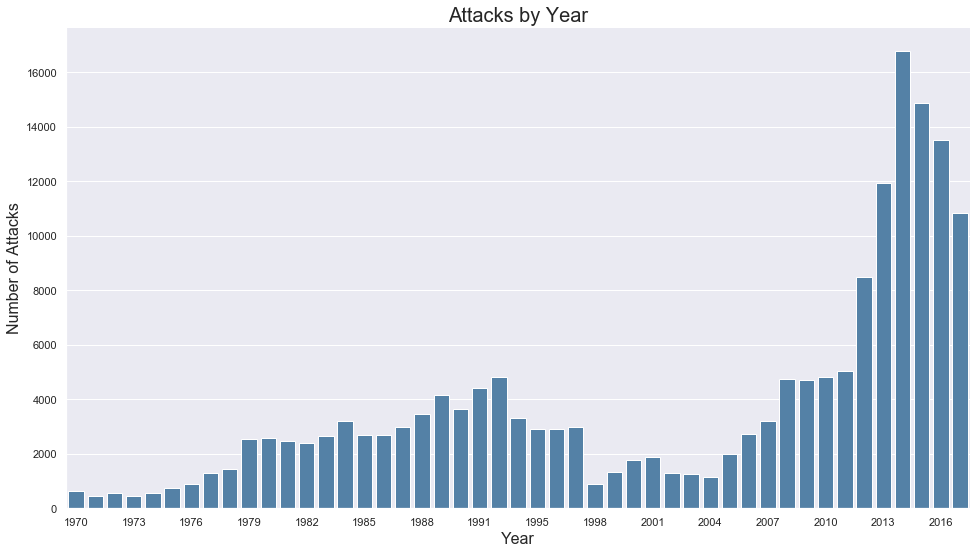

In [26]:
years = np.arange(1970, 2017)
#Draw a count plot to show the number of attacks each year
plt1 = sns.catplot("iyear", data=gtd_cln, kind="count", color='steelblue', height=7.5, aspect=1.8)
plt1.set_xticklabels(step=3)
_ = plt.title('Attacks by Year', fontsize = 20)
_ = plt.xlabel('Year', fontsize = 16)
_ = plt.ylabel('Number of Attacks', fontsize = 16)
plt.show();

## Fatalities by the years

Plot the number of confirmed fatalities by year.

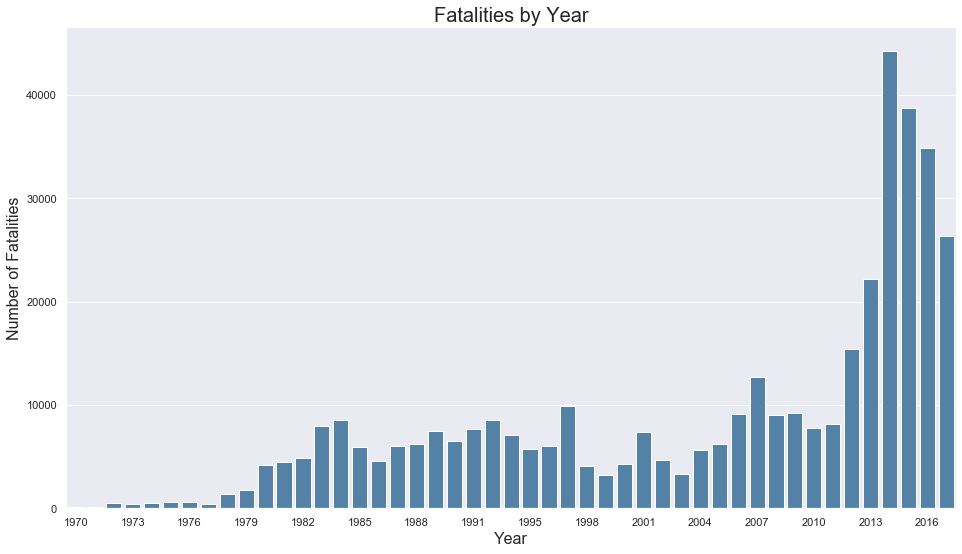

In [28]:
#Make a range of years to show categories with no observation
df1 = gtd_cln[['iyear', 'nkill']]
gp1 = df1.groupby(['iyear'], as_index = False).sum()
#Draw a count plot to show the number of attacks each year
plt1 = sns.catplot(x = 'iyear', y = 'nkill', data=gp1, kind = 'bar', color='steelblue', height=7.5, aspect=1.8)
plt1.set_xticklabels(step=3)
_ = plt.title('Fatalities by Year', fontsize = 20)
_ = plt.xlabel('Year', fontsize = 16)
_ = plt.ylabel('Number of Fatalities', fontsize = 16)
plt.show();

## Number of attacks

Horizontal graph of number of attacks in each country which is sorted descendingly

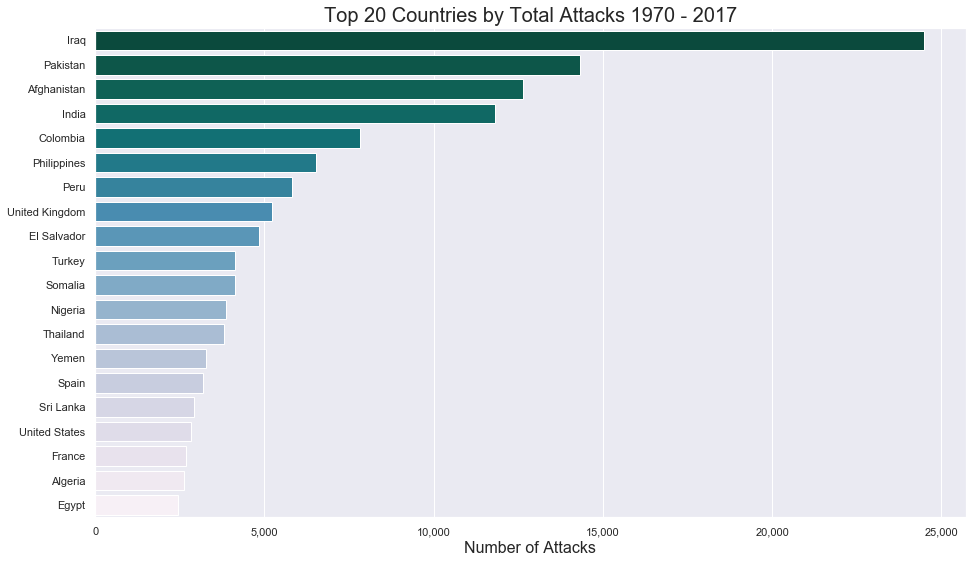

In [48]:
data = gtd_cln[['country_txt']].copy()
data['event_id'] = data.index
#Calculate the number of attacks
data = data.groupby(['country_txt']).agg(['count'])
data = data.reset_index()
data.columns = ['Country','Attacks']
#Order attacks descending
data = data.sort_values('Attacks', ascending=False)[0:20]
data = data.reset_index()
#Set the color palette in reverse
colors = sns.color_palette('PuBuGn', len(data))
colors.reverse()
plt.figure(figsize=(15.6, 9.0))
#Plot bar chart with index as y values
ax = sns.barplot(data.Attacks, data.index, orient='h', palette=colors)
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
#Reset the y labels
ax.set_yticklabels(data.Country)
ax.set_xlabel(xlabel='Number of Attacks', fontsize=16)
ax.set_title(label='Top 20 Countries by Total Attacks 1970 - 2017', fontsize=20)
plt.show();

## Wordcloud

Wordcloud of the most affected Countries

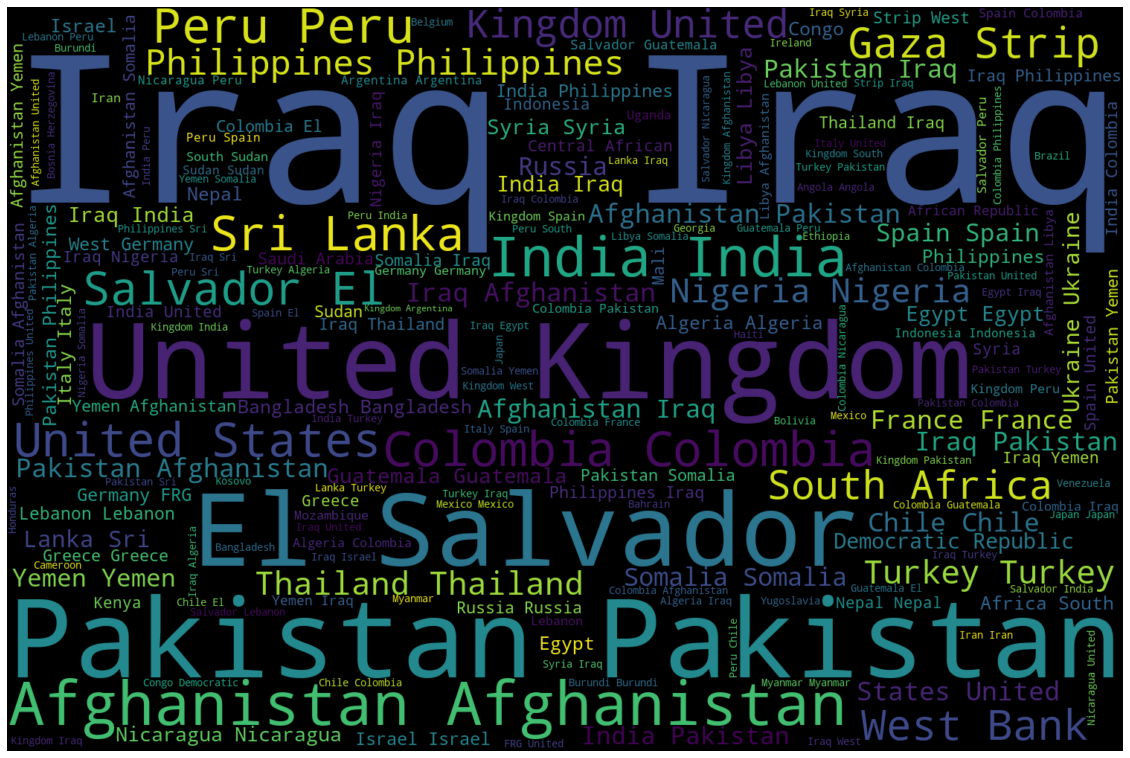

In [66]:
all_words = ' '.join([text for text in gtd_cln['country_txt']]) #populating all words with most affected countries by the years
from wordcloud import WordCloud
wordcloud = WordCloud(width=1500, height=1000, random_state=1, max_font_size=1000).generate(all_words)

plt.figure(figsize=(20, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Attacks by Geographical Region

Further information can be gleaned by examining the attacks by geographic region.

In [46]:
gtd_cln.region_txt.value_counts()

Middle East & North Africa     49577
South Asia                     44479
South America                  18110
Sub-Saharan Africa             17011
Western Europe                 16482
Southeast Asia                 11945
Central America & Caribbean     9344
Eastern Europe                  5117
North America                   3449
East Asia                        794
Central Asia                     548
Australasia & Oceania            276
Name: region_txt, dtype: int64

## Attacks by Type

Plot depicting the total number of attacks by attack type from 1970 to 2017.

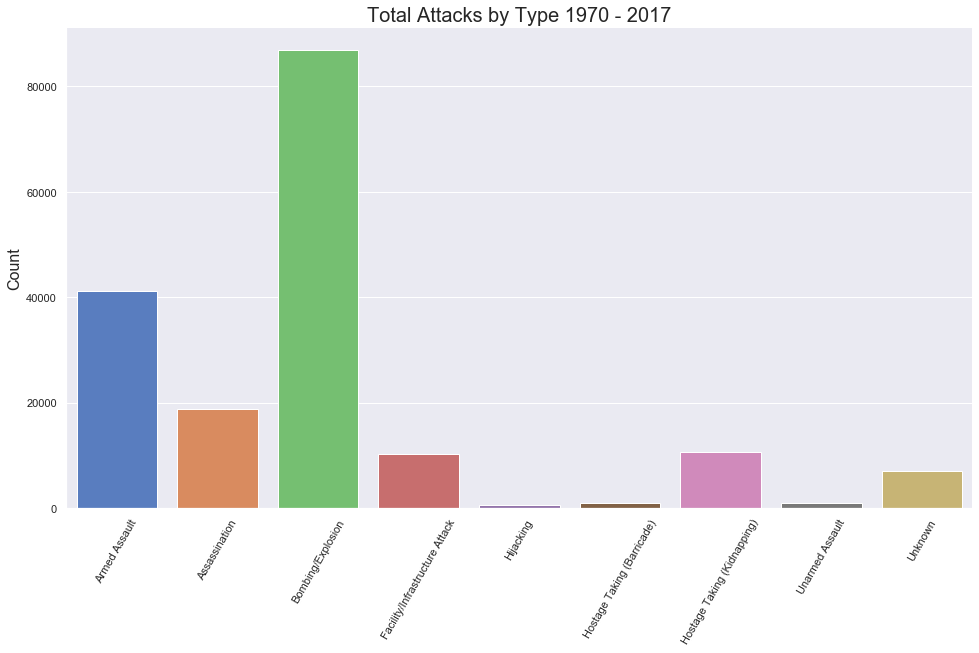

In [49]:
ax = sns.catplot('attacktype1_txt', data=gtd_cln, height=7.5, aspect=1.8, kind="count")
ax.set_xticklabels(rotation=60)
ax = plt.ylabel('Count', fontsize=16)
ax = plt.xlabel('',)
ax = plt.title('Total Attacks by Type 1970 - 2017', fontsize=20)
plt.show();

## Attacks by Weapon Type

Plot showing the total number of attacks by weapon type from 1970 to 2017.

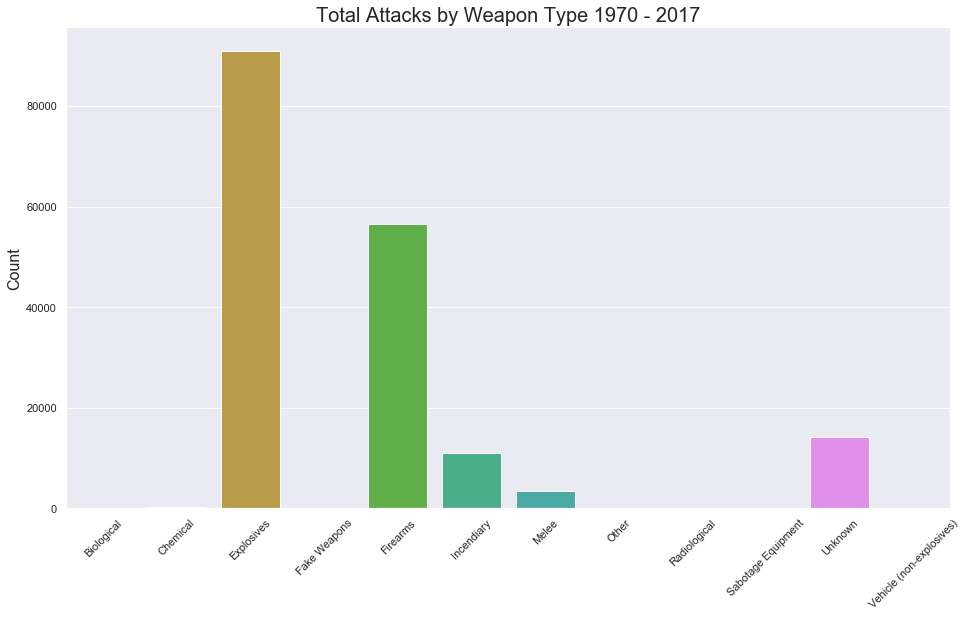

In [56]:
ax = sns.catplot('weaptype1_txt', data=gtd_cln, height=7.5, aspect=1.8, kind="count")
ax.set_xticklabels(rotation=45)
ax = plt.ylabel('Count', fontsize=16)
ax = plt.xlabel('',)
ax = plt.title('Total Attacks by Weapon Type 1970 - 2017', fontsize=20)
plt.show();

## Fatalities Empirical Cumulative Distribution

Removing the outliers, the values greater than three standard deviations, shows that approximately 80% of attacks have less than three fatalities.

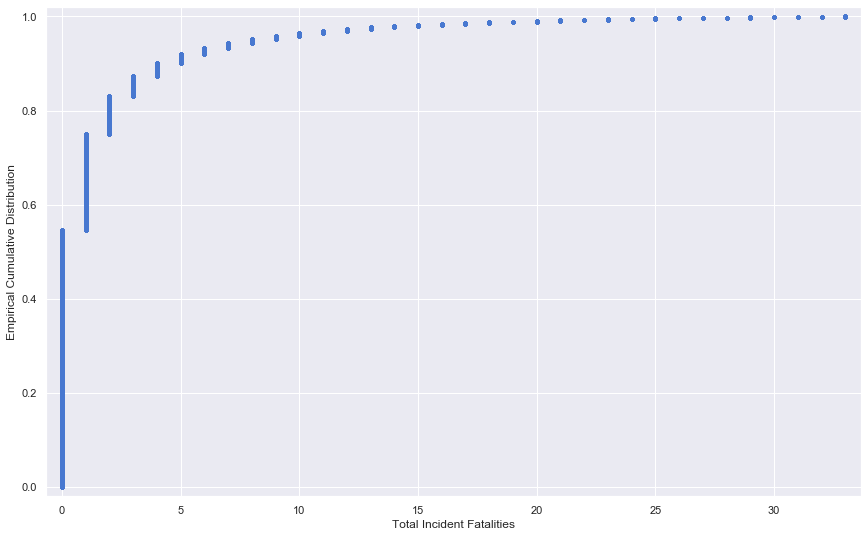

In [59]:
#Removing outliers
nkill_std = gtd_cln['nkill'].std()
nkill_no_outliers = gtd_cln[gtd_cln['nkill'] <= (3 * nkill_std)]
# x is the quantity measured
x = np.sort(nkill_no_outliers['nkill'])
# y is fraction of data points that have value smaller than the corresponding x value
y = np.arange(1, len(x) + 1) / len(x)
_ = plt.plot(x, y, marker = '.', linestyle = 'none')
_ = plt.xlabel('Total Incident Fatalities')
_ = plt.ylabel('Empirical Cumulative Distribution')
plt.margins(0.02)
plt.show()

## Renaming the features

converting the Fatalities and Injuries features to 'int' data type.

In [60]:
t_data = gtd_cln.rename(
    columns={'eventid':'id', 'iyear':'year', 'imonth':'month', 'iday':'day',
             'country_txt':'country', 'provstate':'state', 'targtype1_txt':'target',
             'weaptype1_txt': 'weapon', 'attacktype1_txt': 'attacktype', 'nkill':'fatalities', 
             'nwound':'injuries', 'addnotes': 'info'})
t_data['fatalities'] = t_data['fatalities'].fillna(0).astype(int)
t_data['injuries'] = t_data['injuries'].fillna(0).astype(int)
t_data = t_data.dropna(how='any', subset=['latitude', 'longitude'])
print('Matrix size:', t_data.shape)

Matrix size: (177132, 41)


seems like we have 177132 entries and 41 features

In [62]:
t_data.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177132 entries, 0 to 181690
Data columns (total 41 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   id                177132 non-null  int64   
 1   year              177132 non-null  int64   
 2   month             177132 non-null  int64   
 3   day               177132 non-null  int64   
 4   country           177132 non-null  category
 5   region_txt        177132 non-null  category
 6   state             177132 non-null  object  
 7   city              177132 non-null  object  
 8   latitude          177132 non-null  float64 
 9   longitude         177132 non-null  float64 
 10  specificity       177132 non-null  category
 11  attacktype        177132 non-null  category
 12  target            177132 non-null  category
 13  targsubtype1_txt  177132 non-null  category
 14  target1           177132 non-null  object  
 15  natlty1_txt       177132 non-null  category
 16  gn

## Terrorist attacks by latitude and longitude around the globe

Let's make the illustration of the major terrorist attacks over 2015 on the globe.

In [74]:
import plotly.graph_objs as go
t1 = go.Scattergeo(
    geo='geo3',
    lon=t_data[(t_data['year']==2015) & (t_data['fatalities']>=7)]['longitude'],
    lat=t_data[(t_data['year']==2015) & (t_data['fatalities']>=7)]['latitude'],
    mode='markers',
    marker=go.Marker(
        size = 3,
        opacity=0.7,
        color='red',
    ),
    text=t_data[(t_data['year']==2015) & (t_data['fatalities']>=7)]['country']
)
data=[t1]
layout = go.Layout(
    title='Terrorist attacks with 7 or more fatalities in 2015',
    height=700,
    dragmode='zoom',
    geo3=dict(
        projection=dict(
            type='orthographic', 
        ),
        scope='world', 
        showlakes=True,
        showocean=True,
        showland=True,
        showcountries=True,
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

 Let's extract data about India and make some adjustments.

In [76]:
t_ind = t_data[t_data['country'] == 'India']
t_ind.loc[:, 'day'] = t_ru\
        .apply(lambda row: str(row['id'])[6:8] if row['day'] == 0 else row['day'], axis=1)
t_ind.loc[:, 'date'] = pd.to_datetime(t_ru[['day', 'month', 'year']])

t_ind = t_ru.drop_duplicates(['date', 'latitude', 'longitude', 'fatalities'])
t_ind['text'] = t_ru['date'].dt.strftime('%B %-d, %Y') + '<br>' +\
                     t_ru['fatalities'].astype(str) + ' Killed, ' +\
                     t_ru['injuries'].astype(str) + ' Injured'
t_peryear = np.asarray(t_ru.groupby('year').year.count())
t_years = np.arange(1970, 2017)
t_ind.head()

C:\Users\KamuniSuhas\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\KamuniSuhas\anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,year,month,day,country,region_txt,state,city,latitude,longitude,specificity,attacktype,target,targsubtype1_txt,target1,natlty1_txt,gname,weapon,weapsubtype1_txt,fatalities,injuries,dbsource,extended_txt,vicinity_txt,crit1_txt,crit2_txt,crit3_txt,doubtterr_txt,multiple_txt,success_txt,suicide_txt,guncertain1_txt,individual_txt,property_txt,ishostkid_txt,INT_LOG_txt,INT_IDEO_txt,INT_MISC_txt,INT_ANY_txt,incident_date,evnt_dt,date,text
1186,197202220004,1972,2,22,India,South Asia,Delhi,New Delhi,28.585836,77.153336,1.0,Hijacking,Airports & Aircraft,Aircraft (not at an airport),B-747,Germany,Palestinians,Explosives,Unknown Explosive Type,0,0,Hijacking DB,NO,NO,YES,YES,YES,NO,NO,YES,NO,NO,NO,NO,YES,YES,YES,YES,YES,1972-2-22,1972-2-22,1972-02-22,"1972-02-22 00:00:00<br>0 Killed, 0 Injured"
2764,197501190004,1975,1,2,India,South Asia,Bihar,Samastipur,25.863042,85.781004,1.0,Bombing/Explosion,Government (General),"Government Personnel (excluding police, military)",Lalit Narayan Mishra and a legislator,India,Ananda Marga,Explosives,Unknown Explosive Type,4,0,UMD Encyclopedia of World Terrorism 2012,NO,NO,YES,YES,YES,NO,NO,YES,NO,YES,NO,NO,NO,NO,NO,NO,NO,1975-1-2,1975-1-2,1975-01-02,"1975-01-02 00:00:00<br>4 Killed, 0 Injured"
3857,197605260001,1976,5,26,India,South Asia,Delhi,New Delhi,28.585836,77.153336,1.0,Bombing/Explosion,Airports & Aircraft,Airport,New Delhi airport,India,Unknown,Explosives,Unknown Explosive Type,0,0,PGIS,NO,NO,YES,YES,YES,NO,NO,YES,NO,NO,NO,YES,NO,UNKNOWN,UNKNOWN,NO,UNKNOWN,1976-5-26,1976-5-26,1976-05-26,"1976-05-26 00:00:00<br>0 Killed, 0 Injured"
5327,197709280004,1977,9,28,India,South Asia,Maharashtra,Bombay,19.075984,72.877656,1.0,Hijacking,Airports & Aircraft,Aircraft (not at an airport),DC-8,Japan,Japanese Red Army (JRA),Firearms,Unknown Gun Type,0,0,Hijacking DB,NO,NO,YES,YES,YES,NO,NO,YES,NO,NO,NO,NO,YES,YES,YES,YES,YES,1977-9-28,1977-9-28,1977-09-28,"1977-09-28 00:00:00<br>0 Killed, 0 Injured"
7337,197901130004,1979,1,13,India,South Asia,Assam,UNKNOWN,26.200605,92.937574,4.0,Armed Assault,Police,Police Patrol (including vehicles and convoys),patrol,India,Naga People,Firearms,Automatic or Semi-Automatic Rifle,0,0,PGIS,NO,NO,YES,YES,YES,UNKNOWN,NO,YES,NO,NO,NO,YES,NO,NO,NO,NO,NO,1979-1-13,1979-1-13,1979-01-13,"1979-01-13 00:00:00<br>0 Killed, 0 Injured"


In [65]:
t_ind.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10957 entries, 1186 to 181689
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                10957 non-null  int64         
 1   year              10957 non-null  int64         
 2   month             10957 non-null  int64         
 3   day               10957 non-null  int64         
 4   country           10957 non-null  category      
 5   region_txt        10957 non-null  category      
 6   state             10957 non-null  object        
 7   city              10957 non-null  object        
 8   latitude          10957 non-null  float64       
 9   longitude         10957 non-null  float64       
 10  specificity       10957 non-null  category      
 11  attacktype        10957 non-null  category      
 12  target            10957 non-null  category      
 13  targsubtype1_txt  10957 non-null  category      
 14  target1           

## Finding the Missing Data

In [69]:
features =t_ind.columns.tolist()
t1 = go.Scatter(
    x=features,
    y=[t_ind[feature].describe()['count'] for feature in features],
    name='Observed Data',
    marker=dict(
        color='midnightblue'
    )    
)
t2 = go.Scatter(
    x=features,
    y=[t_ind.shape[0] - t_ind[feature].describe()['count'] for feature in features],
    name='Missing Data',
    marker=dict(
        color='#BF3030'
    )    
)
data = [t1, t2];
layout = go.Layout(
    title='Missingmess Map',
    barmode='relative',
    xaxis=dict(
        title='Feature',
    ),
    yaxis=dict(
        title='Count',
    ),    
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

so we have no missing values in our interim data set for India

we can go ahead with the visualization

## Terrorist attacks for years

Let's look more scrutiny at the number of terrorist attacks each year in India

In [77]:
t1 = go.Bar(
    x = t_years,
    y = t_peryear.cumsum(),
    name = 'Total number',
    marker=dict(
        color='steelblue'
    )
)
t2 = go.Scatter(
    x = t_years,
    y = t_peryear,
    name = 'Per year',
    mode = 'lines+markers',
    marker = dict(
        size = 5,
        symbol = 'diamond',
        color='#BF3030',
    ),
    line = dict(
        width = 2,
        color='#BF3030',
    ),
)
layout = go.Layout(
    title = 'Terrorist Attacks for years in India (1970-2017)',
    barmode='group',
    xaxis = dict(
        title = 'Year',
    ),
    yaxis = dict(
        title = 'Number of attacks',
    ),
    legend=dict(
        x=0,
        y=1
    )
)
data = [t1, t2]
fig = dict(data = data, layout = layout)
iplot(fig)

## Attacks per weekday

graph of day based attacks

In [87]:
t_ind['weekday'] = t_ind['date'].apply(lambda x: datetime.isoweekday(x))
trace = go.Bar(
    x=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    y=t_ind.groupby('weekday').weekday.count().tolist(),
    marker=dict(
        color=['steelblue'] * 5 + ['olivedrab'] * 2
    ),
)
layout = go.Layout(
    title = 'Terrorist Attacks by Weekday in India (1970-2017)',
    xaxis = dict(
        title = 'Weekday',
    ),
    yaxis = dict(
        title = 'Number of attacks',
    )
)
data = [trace]
figure = dict(data = data, layout = layout)
iplot(figure)

Sunday is the day with the less often terrorist attacks in India. The general part of them occurs on Thursdays – the least part among workdays happens on Friday.

## Terrorist attacks to cities

Let's make a bar chart, which presents the most vulnerable cities in India:

In [106]:
cities = t_ind['city'].value_counts()[t_ind['city'].value_counts()>=20]
# removing unknown cities
cities = cities[cities.index!='Unknown']
trace = go.Bar(
    x=cities.index,
    y=cities,
    marker=dict(
        color='olivedrab'
    )    
)
data = [trace]
layout = go.Layout(
    title='The most frequently terrorist attacked cities in India (1970-2017)',
    xaxis=dict(
        title='City',
    ),
    yaxis=dict(
        title='Number of attacks',
    ),  
    annotations=[
        dict(x=xi,y=yi,
             text=str(yi),
             xanchor='center',
             yanchor='bottom',
             showarrow=False,
        ) for xi, yi in zip(cities.index, cities)
    ]
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

The above-mentioned cities could be seen as injures and fatalities coordinates

## Most Frequently Attacked Cities

A Scatter plot of weighed values of the above

In [104]:
fat = t_ind[t_ind['city'].isin(cities.index)].groupby('city').sum()['fatalities']
inj = t_ind[t_ind['city'].isin(cities.index)].groupby('city').sum()['injuries']
trace = go.Scatter(
    x=inj,
    y=fat,
    mode='markers',
    marker=go.Marker(
        size = (fat+inj) ** 0.65,
        opacity=0.7,
        color='#D60000',
    ),
    text=t_ind[t_ind['city'].isin(cities.index)].groupby('city').sum().index,
    hoverinfo='text',
)
data = [trace]
layout = go.Layout(
    title='The most frequently terrorist attacked cities in India (1970-2017)',
    xaxis=dict(
        title='fatalities',
    ),
    yaxis=dict(
        title='injuries',
    ),
    hovermode='closest',
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

We can see that Srinagar has the most number of attacks in last 5 decades with Mumbai and Delhi very close

# THE END